## №1

In [82]:
# Импорт необходимых библиотек
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

# Загрузка Fashion MNIST датасета
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

criterion = nn.CrossEntropyLoss()


In [23]:
# Определение архитектуры модели
class FashionClassifier(nn.Module):
    def __init__(self):
        super(FashionClassifier, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = FashionClassifier()

# Определение оптимизатора
optimizer = optim.Adam(model.parameters(), lr=0.001)

FashionClassifier(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


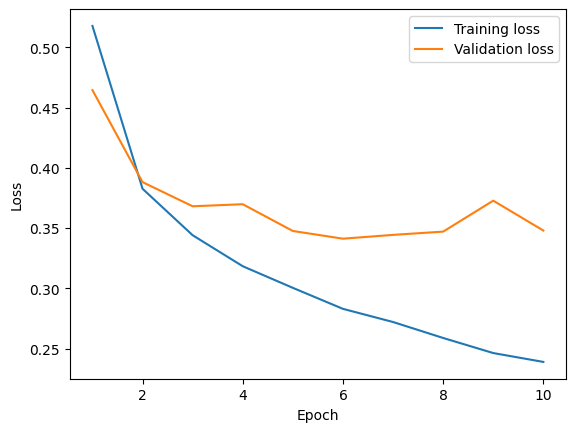

In [24]:
# Обучение модели
NUM_EPOCHS = 10
train_losses_skip = []
test_losses_skip = []

for epoch in tqdm(range(NUM_EPOCHS)):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    train_losses_skip.append(running_loss / len(trainloader))

    # Вычисление loss на тестовом датасете
    test_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            inputs, labels = data
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    test_losses_skip.append(test_loss / len(testloader))

# Вывод summary модели
print(model)

# Визуализация графиков обучения
plt.plot(range(1, NUM_EPOCHS + 1), train_losses_skip, label='Training loss')
plt.plot(range(1, NUM_EPOCHS + 1), test_losses_skip, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Обучение на обучающей выборке показывает хорошие результаты. На валидационной выборке в 6 эпохе минимальная ошибка, дальше начинает расти, в 9 эпохе на промежутке от 3 до 10 локальный максимум лосса.

## №2

In [27]:
# Определение архитектуры модели
class FashionClassifierConv(nn.Module):
    def __init__(self):
        super(FashionClassifierConv, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.fc1 = nn.Linear(64 * 5 * 5, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.max_pool2d(x, 2, 2)
        x = torch.relu(self.conv2(x))
        x = torch.max_pool2d(x, 2, 2)
        x = x.view(-1, 64 * 5 * 5)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = FashionClassifierConv()

# Определение оптимизатора
optimizer = optim.Adam(model.parameters(), lr=0.001)


100%|██████████| 10/10 [15:11<00:00, 91.13s/it]


FashionClassifierConv(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=1600, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


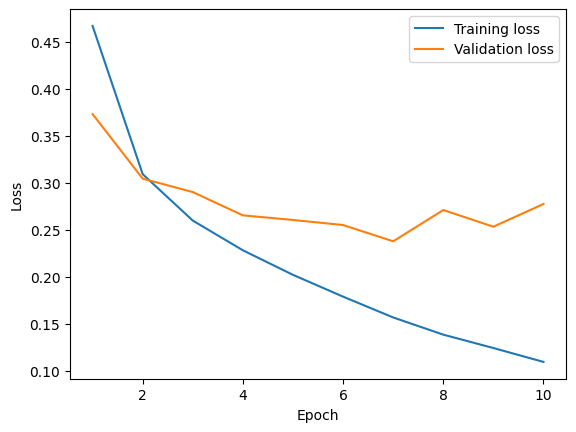

In [28]:
# Обучение модели
NUM_EPOCHS = 10
train_losses_skip = []
test_losses_skip = []

for epoch in tqdm(range(NUM_EPOCHS)):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    train_losses_skip.append(running_loss / len(trainloader))

    # Вычисление loss на тестовом датасете
    test_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            inputs, labels = data
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    test_losses_skip.append(test_loss / len(testloader))

# Вывод summary модели
print(model)

# Визуализация графиков обучения
plt.plot(range(1, NUM_EPOCHS + 1), train_losses_skip, label='Training loss')
plt.plot(range(1, NUM_EPOCHS + 1), test_losses_skip, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Довольно схожая с первой кривая, но ошибка у этой модели с свёрткой стала меньше. Обучение модели с свёрткой было дольше, около 15 минут, а прошлой 4 минут.

## №3

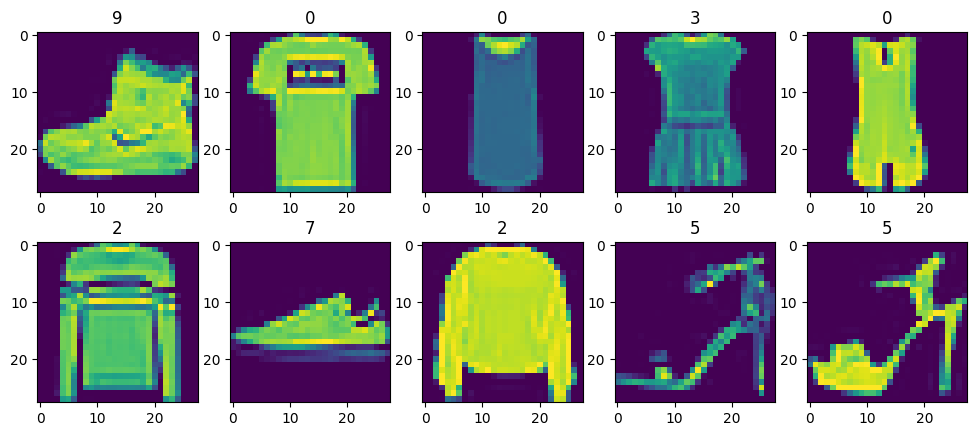

In [39]:
trainset.transform = None

plt.figure(figsize=(12,5))

for i in range(10):
    x, y = trainset[i]
    plt.subplot(2, 5, i + 1)
    plt.title(f'{y}')
    plt.imshow(x)

plt.show()

In [68]:
transform = transforms.Compose([transforms.RandomRotation(degrees=180, expand=False, center=None),
                                transforms.ColorJitter(brightness=(0.5, 1), contrast=(0.5, 1))])

Применим аугментацию. Добавил повороты, изменение контраста от 0.5 до 1 и яркости от 0.5 до 1.

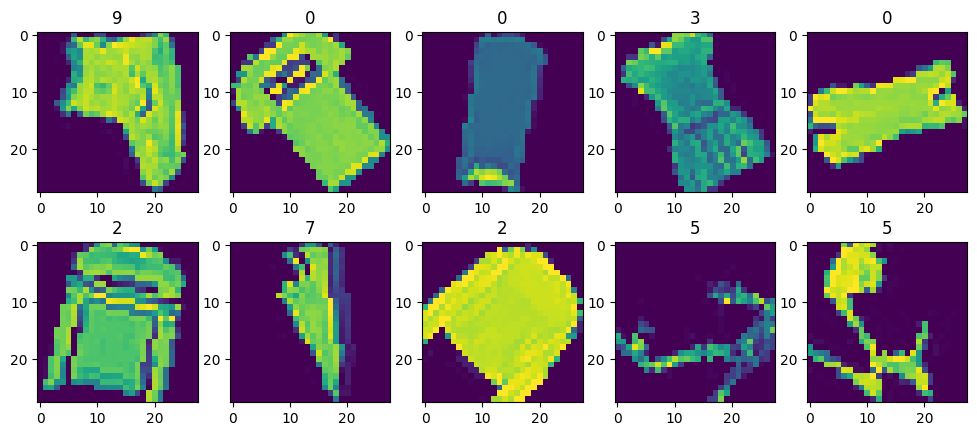

In [70]:
trainset.transform = transform

plt.figure(figsize=(12,5))

for i in range(10):
    x, y = trainset[i]
    plt.subplot(2, 5, i + 1)
    plt.title(f'{y}')
    plt.imshow(x)

plt.show()

In [142]:
transform = transforms.Compose([transforms.RandomRotation(degrees=180, expand=False, center=None),
                                transforms.ColorJitter(brightness=(0.5, 1), contrast=(0.5, 1)), transforms.ToTensor(), 
                                transforms.Normalize((0.5,), (0.5,))])

In [143]:
trainset.transform = transform


In [144]:
# Определение архитектуры модели
class FashionClassifierConv(nn.Module):
    def __init__(self):
        super(FashionClassifierConv, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.fc1 = nn.Linear(64 * 5 * 5, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.max_pool2d(x, 2, 2)
        x = torch.relu(self.conv2(x))
        x = torch.max_pool2d(x, 2, 2)
        x = x.view(-1, 64 * 5 * 5)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = FashionClassifierConv()

# Определение оптимизатора
optimizer = optim.Adam(model.parameters(), lr=0.001)


100%|██████████| 20/20 [33:05<00:00, 99.27s/it] 

FashionClassifierConv(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=1600, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


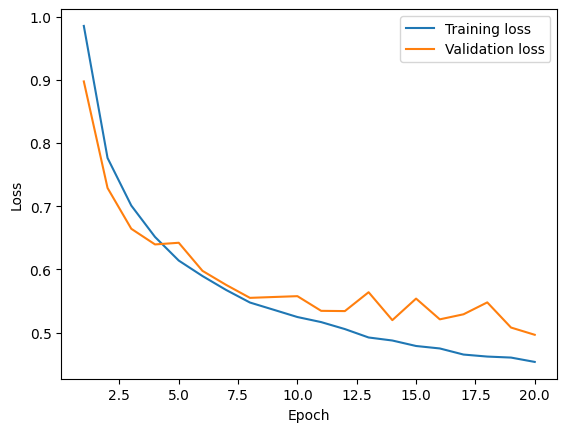

In [148]:
# Обучение модели
NUM_EPOCHS = 20
train_losses = []
test_losses = []

for epoch in tqdm(range(NUM_EPOCHS)):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    train_losses.append(running_loss / len(trainloader))

    # Вычисление loss на тестовом датасете
    test_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            inputs, labels = data
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    test_losses.append(test_loss / len(testloader))

# Вывод summary модели
print(model)

# Визуализация графиков обучения
plt.plot(range(1, NUM_EPOCHS + 1), train_losses, label='Training loss')
plt.plot(range(1, NUM_EPOCHS + 1), test_losses, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [149]:
print(train_losses)
print(test_losses)

[0.9853142843698897, 0.7762995850938216, 0.7010210925327943, 0.6513544718848109, 0.6139654649981557, 0.5894849737887697, 0.5673724897444121, 0.5475632165794941, 0.536118891320503, 0.5246171702199908, 0.516609326958148, 0.5055572666497882, 0.4922472709563495, 0.48745815581413726, 0.4787838377836925, 0.47488171745465, 0.46522054563898013, 0.4620512363943718, 0.46046111332391626, 0.4535742762055733]
[0.8974732253581855, 0.7288299819846062, 0.6642951661614096, 0.6395159147347614, 0.6421489806691553, 0.5976996408526305, 0.5754034638784493, 0.5549569475422998, 0.5563173827472007, 0.5576444275819572, 0.5344142857820365, 0.5340276711685642, 0.5638703759878304, 0.5196893204739139, 0.5537937325277146, 0.5209619176046104, 0.5289581580336686, 0.5477993706609033, 0.5079895220934205, 0.49651301875235926]


Сравнивая график с аугментацией, с 20-ю эпохами, и график без неё, с 10-ю эпохами, я прихожу к выводу, что обучая модель на данных с аугментацией развивается "универсальность" распознования, но при этом ошибка увеличвается по сравнению с графиком 10-ти поколений (для её снижения необходимо "усложнять" архитектуру или увеличивать число эпох).

## №4

In [243]:
# Определение модели с skip-connection
class FashionClassifierConvSkip(nn.Module):
    def __init__(self):
        super(FashionClassifierConvSkip, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.fc1 = nn.Linear(64 * 5 * 5, 128)
        self.fc2 = nn.Linear(128, 10)
        self.skip_connection = nn.Linear(64 * 5 * 5, 128)

    def forward(self, x):
        # Прямой проход через сверточные слои
        x = torch.relu(self.conv1(x))
        x = torch.max_pool2d(x, 2, 2)
        x = torch.relu(self.conv2(x))
        x = torch.max_pool2d(x, 2, 2)
        # Пропускаем через слой skip connection
        skip_x = x.view(-1, 64 * 5 * 5)
        skip_x = torch.relu(self.skip_connection(skip_x))
        # Пропускаем через полносвязанный слой
        x = x.view(-1, 64 * 5 * 5)
        x = torch.relu(self.fc1(x))
        # Добавляем skip connection
        x = x + skip_x
        x = self.fc2(x)

        return x


model = FashionClassifierConvSkip()

# Определение оптимизатора
optimizer = optim.Adam(model.parameters(), lr=0.001)


100%|██████████| 20/20 [33:13<00:00, 99.66s/it] 


FashionClassifierConvSkip(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=1600, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
  (skip_connection): Linear(in_features=1600, out_features=128, bias=True)
)


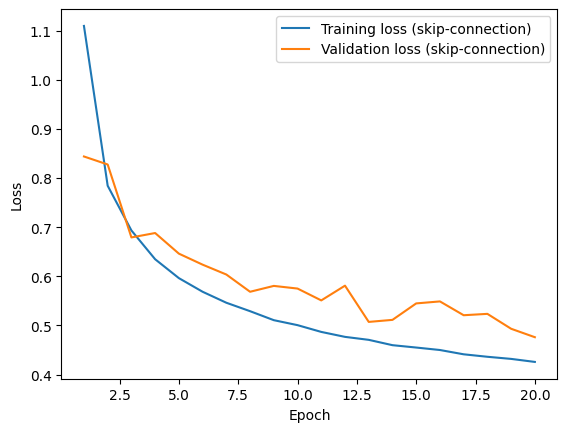

In [154]:
# Обучение модели
NUM_EPOCHS = 20
train_losses_skip = []
test_losses_skip = []

for epoch in tqdm(range(NUM_EPOCHS)):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    train_losses_skip.append(running_loss / len(trainloader))

    # Вычисление loss на тестовом датасете
    test_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            inputs, labels = data
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    test_losses_skip.append(test_loss / len(testloader))

# Вывод summary модели
print(model)

# Визуализация графиков обучения
plt.plot(range(1, NUM_EPOCHS + 1), train_losses_skip, label='Training loss (skip-connection)')
plt.plot(range(1, NUM_EPOCHS + 1), test_losses_skip, label='Validation loss (skip-connection)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Without skip-connection
[0.9853142843698897, 0.7762995850938216, 0.7010210925327943, 0.6513544718848109, 0.6139654649981557, 0.5894849737887697, 0.5673724897444121, 0.5475632165794941, 0.536118891320503, 0.5246171702199908, 0.516609326958148, 0.5055572666497882, 0.4922472709563495, 0.48745815581413726, 0.4787838377836925, 0.47488171745465, 0.46522054563898013, 0.4620512363943718, 0.46046111332391626, 0.4535742762055733]
[0.8974732253581855, 0.7288299819846062, 0.6642951661614096, 0.6395159147347614, 0.6421489806691553, 0.5976996408526305, 0.5754034638784493, 0.5549569475422998, 0.5563173827472007, 0.5576444275819572, 0.5344142857820365, 0.5340276711685642, 0.5638703759878304, 0.5196893204739139, 0.5537937325277146, 0.5209619176046104, 0.5289581580336686, 0.5477993706609033, 0.5079895220934205, 0.49651301875235926]
With skip-connection
[1.1097885414735595, 0.7844109821802517, 0.6933821132823602, 0.6347654063119563, 0.5963243795737528, 0.5685801109843163, 0.5462143189553768, 0.5290230358

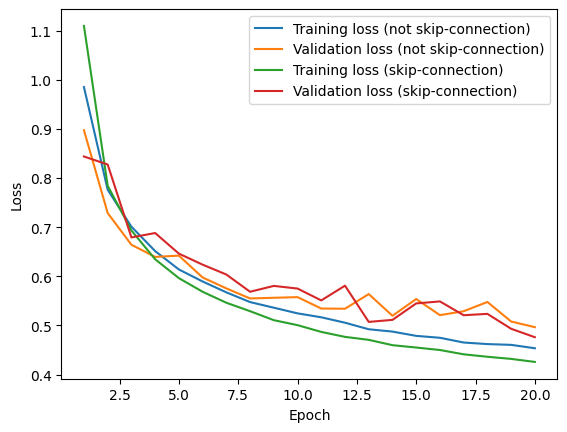

In [158]:
print('Without skip-connection')
print(train_losses)
print(test_losses)
print('With skip-connection')
print(train_losses_skip)
print(test_losses_skip)

# Визуализация графиков обучения
plt.plot(range(1, NUM_EPOCHS + 1), train_losses, label='Training loss (not skip-connection)')
plt.plot(range(1, NUM_EPOCHS + 1), test_losses, label='Validation loss (not skip-connection)')
plt.plot(range(1, NUM_EPOCHS + 1), train_losses_skip, label='Training loss (skip-connection)')
plt.plot(range(1, NUM_EPOCHS + 1), test_losses_skip, label='Validation loss (skip-connection)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Сравню график обучения моделей с skip-connection и без него. На обучающем графике валидационные выборки моделей, почти, не отличаются. Лишь на обучающей выборке, на больших поколениях, лидирует по минимальному лоссу модель со skip-connection. Могу сделать предположение, с увеличением количества эпох график обучения по валидационной выборке с skip-connection будет иметь меньший лосс, чем по валидационной без него, основываюсь на том, что train loss становиться меньше с увеличением эпох(по графику), а validation loss сходиться к train loss.